In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

In [3]:
iris=pd.read_csv("datasets_17860_23404_IRIS.csv")
print(iris.head(5))


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


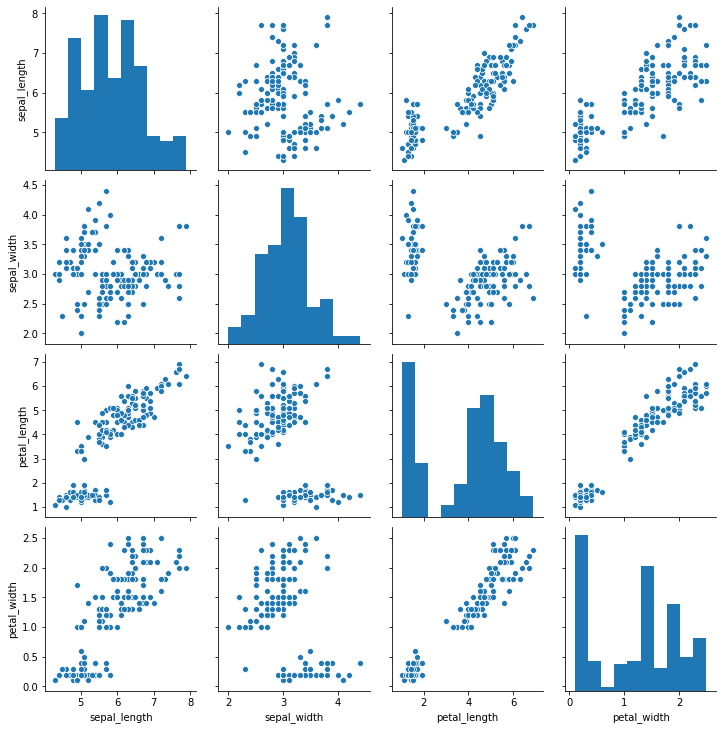

In [9]:
sns.pairplot(iris)

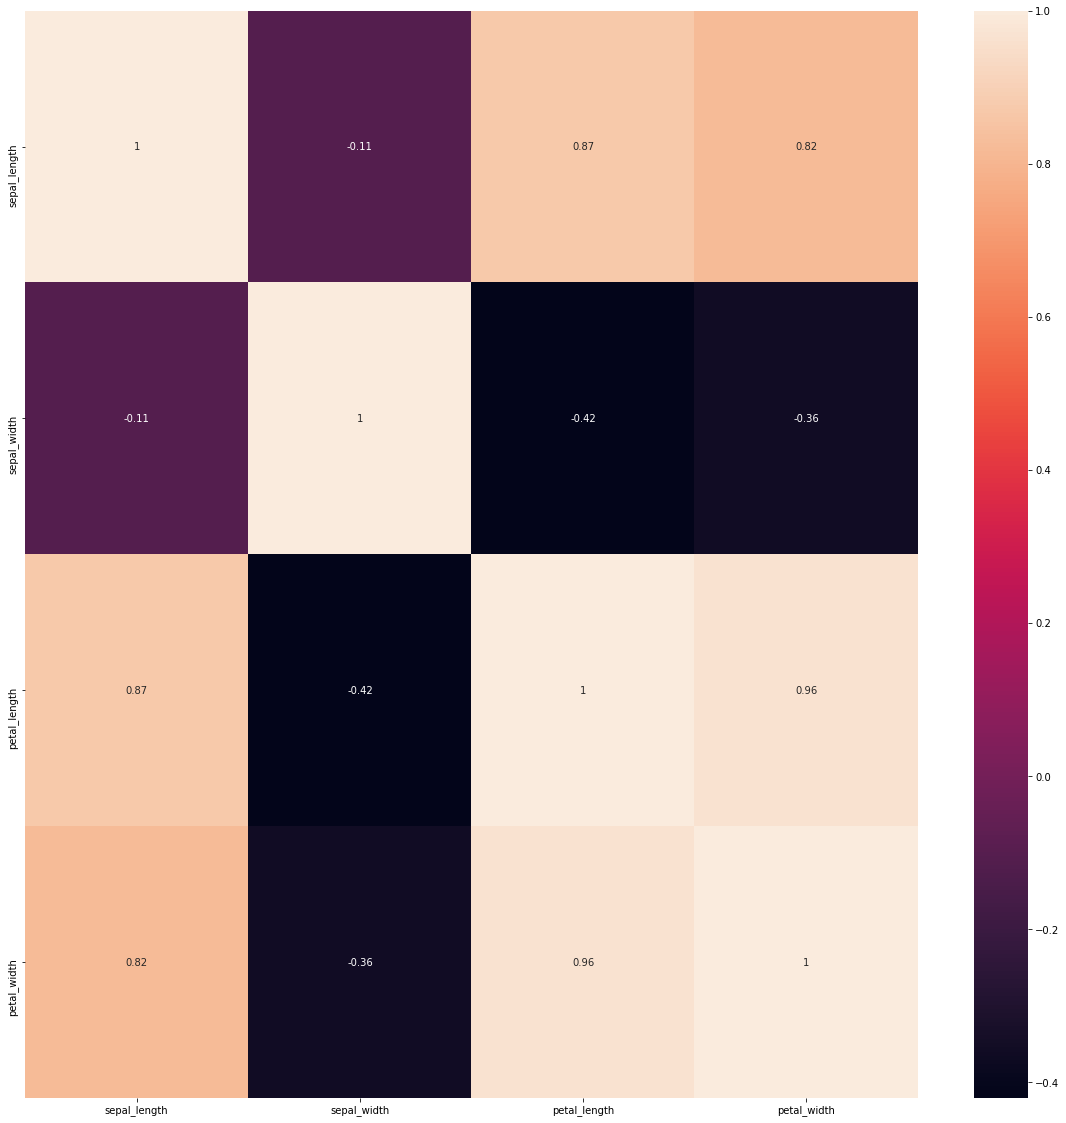

In [11]:
cor=iris.corr()
a=cor.index
plt.figure(figsize=(20,20))
xr=sns.heatmap(iris[a].corr(),annot=True)

In [12]:

x=iris.drop(['species'],axis=1)
y=iris['species']

In [13]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [15]:
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.09965391 0.05757425 0.37401705 0.46875479]


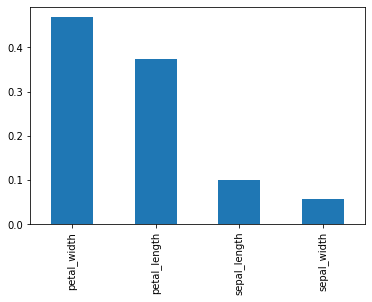

In [20]:
fet=pd.Series(model.feature_importances_,index=x.columns)
fet.nlargest(5).plot(kind='bar')
plt.show()

In [21]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)
print(x_train,y_train)


     sepal_length  sepal_width  petal_length  petal_width
76            6.8          2.8           4.8          1.4
106           4.9          2.5           4.5          1.7
103           6.3          2.9           5.6          1.8
40            5.0          3.5           1.3          0.3
39            5.1          3.4           1.5          0.2
..            ...          ...           ...          ...
63            6.1          2.9           4.7          1.4
137           6.4          3.1           5.5          1.8
79            5.7          2.6           3.5          1.0
125           7.2          3.2           6.0          1.8
123           6.3          2.7           4.9          1.8

[135 rows x 4 columns] 76     Iris-versicolor
106     Iris-virginica
103     Iris-virginica
40         Iris-setosa
39         Iris-setosa
            ...       
63     Iris-versicolor
137     Iris-virginica
79     Iris-versicolor
125     Iris-virginica
123     Iris-virginica
Name: species, Length: 135,

In [22]:
cls=RandomForestClassifier(n_estimators=100)
cls.fit(x_train,y_train)

pre=cls.predict(x_test)

In [23]:
pre


array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

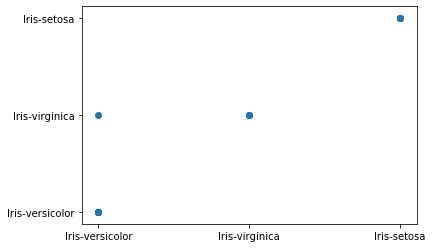

In [26]:
plt.scatter(y_test,pre)

In [27]:

print(sklearn.metrics.accuracy_score(y_test,pre))
print(sklearn.metrics.classification_report(y_test,pre))

0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.75      1.00      0.86         3

       accuracy                           0.93        15
      macro avg       0.92      0.96      0.93        15
   weighted avg       0.95      0.93      0.94        15



<BarContainer object of 15 artists>

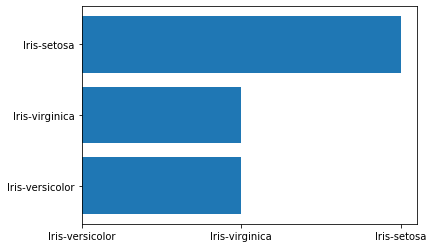

In [32]:
plt.barh(y_test,pre)

<BarContainer object of 15 artists>

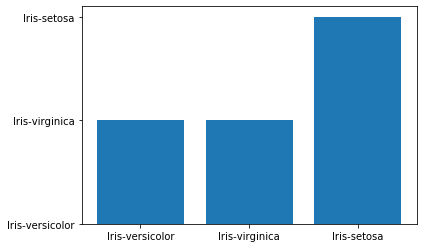

In [36]:
plt.bar(y_test,pre)

In [39]:
print("thankyou")

thankyou
